In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!gdown 1_HoZJ1rKCga2BT40f7hxc1L17KMBN9rW

Downloading...
From: https://drive.google.com/uc?id=1_HoZJ1rKCga2BT40f7hxc1L17KMBN9rW
To: /content/data5 (3).csv
100% 20.0M/20.0M [00:00<00:00, 83.7MB/s]


In [4]:
df = pd.read_csv('data5 (3).csv')

In [5]:
df.shape

(60514, 19)

In [6]:
df.head()

,paperId,questionId,candidateId,answerSheetId,answer_score,maxScore,answeredCorrectly,Difficulty,firstSeenAt,lastAnsweredAt,ResponseTime,Expected response time,SequenceOrder,TotalTestingTime,IpAddress,ExamScore,Z2,KL,KS
0,bc7a123c-daaa-405e-a04d-c09d895232c9,9405ae69-868d-49c1-9d38-58cddc2fc891,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:36:44.442,2024-01-21 05:37:13.211,28.769,30.759,1.0,5335.466,NaN,74.0,-0.391312,2.469242,0.173333
1,bc7a123c-daaa-405e-a04d-c09d895232c9,78372e74-b56b-4ae1-baaf-c03da5c0bc77,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:37:14.865,2024-01-21 05:37:39.786,24.921,28.718,2.0,5335.466,NaN,74.0,-0.405261,2.469242,0.173333
2,bc7a123c-daaa-405e-a04d-c09d895232c9,5308137a-b32a-4df9-808c-d58b487293ff,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:37:41.484,2024-01-21 05:38:04.821,23.337,30.042,3.0,5335.466,NaN,74.0,-0.411003,2.469242,0.173333
3,bc7a123c-daaa-405e-a04d-c09d895232c9,768dcdd6-d972-41f6-a52b-b67aa4b8da71,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,7,0,1.0,2024-01-21 05:38:27.227,2024-01-21 05:38:45.246,18.019,36.136,4.0,5335.466,NaN,74.0,-0.430281,2.469242,0.173333
4,bc7a123c-daaa-405e-a04d-c09d895232c9,2fe0e7e3-92b3-41fb-8d60-53f183d085b8,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,7,0,1.0,2024-01-21 05:38:46.866,2024-01-21 05:39:14.347,27.481,37.858,5.0,5335.466,NaN,74.0,-0.395981,2.469242,0.173333


In [7]:
unique_candidate_count = df['answerSheetId'].nunique()

print(f"Number of unique answerSheetId in the DataFrame: {unique_candidate_count}")

Number of unique answerSheetId in the DataFrame: 1010


In [8]:
def calculate_guttman_error(df):
    # Initialize the Guttman error column
    df['guttmanError'] = 0

    # Iterate through each group (e.g., each candidate and their answers)
    for _, group in df.groupby(['candidateId', 'answerSheetId']):
        errors = []
        incorrect_found = False
        incorrect_index = -1
        for index, row in group.iterrows():
            if row['answeredCorrectly'] == 0:
                if incorrect_found:
                    # Update all correct responses after the last incorrect one
                    errors[incorrect_index:] = [x + 1 for x in errors[incorrect_index:]]
                incorrect_found = True
                incorrect_index = len(errors)
                errors.append(0)
            else:
                errors.append(0)

        # Place the computed errors back into the DataFrame
        df.loc[group.index, 'guttmanError'] = errors

    return df

# Calculate Guttman errors
df = calculate_guttman_error(df)

In [9]:
def calculate_guttman_score(df):
    # Ensure 'total_items' is correctly computed if not already in the DataFrame
    if 'total_items' not in df.columns:
        df['total_items'] = df.groupby(['candidateId', 'answerSheetId'])['questionId'].transform('count')
    if 'number_correct' not in df.columns:
        df['number_correct'] = df.groupby(['candidateId', 'answerSheetId'])['answeredCorrectly'].transform('sum')

    # Compute the Guttman score (G*), avoiding division by zero
    df['guttmanScore'] = df.apply(lambda x: x['guttmanError'] / (x['number_correct'] * (x['total_items'] - x['number_correct']))
                                  if x['number_correct'] * (x['total_items'] - x['number_correct']) != 0 else 0, axis=1)

    return df

# Assuming the DataFrame 'df' is already defined and loaded with necessary data

# Calculate Guttman scores
df = calculate_guttman_score(df)

# View or export results
print(df[['candidateId', 'answerSheetId', 'guttmanScore', 'guttmanError']])


                                candidateId  \
0      0005c95f-814b-4117-8065-f25c33f1e712   
1      0005c95f-814b-4117-8065-f25c33f1e712   
2      0005c95f-814b-4117-8065-f25c33f1e712   
3      0005c95f-814b-4117-8065-f25c33f1e712   
4      0005c95f-814b-4117-8065-f25c33f1e712   
...                                     ...   
60509  ffff87dd-42c5-4479-acc7-acb6f1e45b17   
60510  ffff87dd-42c5-4479-acc7-acb6f1e45b17   
60511  ffff87dd-42c5-4479-acc7-acb6f1e45b17   
60512  ffff87dd-42c5-4479-acc7-acb6f1e45b17   
60513  ffff87dd-42c5-4479-acc7-acb6f1e45b17   

                              answerSheetId  guttmanScore  guttmanError  
0      6bbfed12-f0f6-4398-8afd-d458341fba3f      0.000711             1  
1      6bbfed12-f0f6-4398-8afd-d458341fba3f      0.000711             1  
2      6bbfed12-f0f6-4398-8afd-d458341fba3f      0.000711             1  
3      6bbfed12-f0f6-4398-8afd-d458341fba3f      0.000711             1  
4      6bbfed12-f0f6-4398-8afd-d458341fba3f      0.000711        

In [10]:
df

,paperId,questionId,candidateId,answerSheetId,answer_score,maxScore,answeredCorrectly,Difficulty,firstSeenAt,lastAnsweredAt,...,TotalTestingTime,IpAddress,ExamScore,Z2,KL,KS,guttmanError,total_items,number_correct,guttmanScore
0,bc7a123c-daaa-405e-a04d-c09d895232c9,9405ae69-868d-49c1-9d38-58cddc2fc891,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:36:44.442,2024-01-21 05:37:13.211,...,5335.466,NaN,74.0,-0.391312,2.469242,0.173333,1,75,37,0.000711
1,bc7a123c-daaa-405e-a04d-c09d895232c9,78372e74-b56b-4ae1-baaf-c03da5c0bc77,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:37:14.865,2024-01-21 05:37:39.786,...,5335.466,NaN,74.0,-0.405261,2.469242,0.173333,1,75,37,0.000711
2,bc7a123c-daaa-405e-a04d-c09d895232c9,5308137a-b32a-4df9-808c-d58b487293ff,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:37:41.484,2024-01-21 05:38:04.821,...,5335.466,NaN,74.0,-0.411003,2.469242,0.173333,1,75,37,0.000711
3,bc7a123c-daaa-405e-a04d-c09d895232c9,768dcdd6-d972-41f6-a52b-b67aa4b8da71,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,7,0,1.0,2024-01-21 05:38:27.227,2024-01-21 05:38:45.246,...,5335.466,NaN,74.0,-0.430281,2.469242,0.173333,1,75,37,0.000711
4,bc7a123c-daaa-405e-a04d-c09d895232c9,2fe0e7e3-92b3-41fb-8d60-53f183d085b8,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,7,0,1.0,2024-01-21 05:38:46.866,2024-01-21 05:39:14.347,...,5335.466,NaN,74.0,-0.395981,2.469242,0.173333,1,75,37,0.000711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60509,bc7a123c-daaa-405e-a04d-c09d895232c9,ddc4f648-f42d-4d5f-8176-ce8ffea63900,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,7,0,1.0,2024-04-22 08:43:53.947,2024-04-22 08:45:47.126,...,5356.581,"37.141.197.60, 15.158.9.72, 172.31.196.6",93.0,-0.085326,0.816754,0.666667,1,73,35,0.000752
60510,bc7a123c-daaa-405e-a04d-c09d895232c9,d25cb76c-7941-474c-a7c6-27e0b4b189a9,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,7,0,1.0,2024-04-22 08:43:54.169,2024-04-22 08:45:47.128,...,5356.581,"37.141.197.60, 15.158.9.72, 172.31.196.6",93.0,-0.086124,0.816754,0.666667,1,73,35,0.000752
60511,bc7a123c-daaa-405e-a04d-c09d895232c9,043348ab-5649-40aa-9a6d-f9ae4e956df6,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,7,0,1.0,2024-04-22 08:44:36.760,2024-04-22 08:45:47.129,...,5356.581,"37.141.197.60, 15.158.9.72, 172.31.196.6",93.0,-0.240512,0.816754,0.666667,1,73,35,0.000752
60512,bc7a123c-daaa-405e-a04d-c09d895232c9,b1fd61f3-587e-40c2-8bc7-1961aafd1eb2,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,10,0,1.0,2024-04-22 08:45:47.523,2024-04-22 08:49:31.958,...,5356.581,"37.141.197.60, 15.158.9.72, 172.31.196.6",93.0,0.317976,0.816754,0.666667,1,73,35,0.000752


In [11]:
def calculate_p_value_distance(df):
    # Calculate p-value distance based on the difficulty difference between consecutive questions
    df = df.sort_values(by=['candidateId', 'answerSheetId', 'firstSeenAt'])  # Ensure the data is sorted
    df['p_value_distance'] = df.groupby(['candidateId', 'answerSheetId'])['Difficulty'].diff().abs().fillna(0)
    return df

In [12]:
def calculate_work_pace(df):
    # Calculate average observed response time per item
    df['averageObservedTime'] = df.groupby(['candidateId', 'answerSheetId'])['ResponseTime'].transform('mean')
    # Calculate average expected response time per item (could be static or calculated from historical data)
    df['averageExpectedTime'] = df.groupby(['candidateId', 'answerSheetId'])['Expected response time'].transform('mean')
    # Calculate work pace
    df['workPace'] = df['averageObservedTime'] / df['averageExpectedTime']
    return df

In [13]:
# Function to calculate Guttman Score corrected for distance (G*d)
def calculate_guttman_score_distance(df, distance_type='positions'):
    # Assuming 'distance' is calculated or set outside this function
    df['distance'] = df.groupby(['candidateId', 'answerSheetId']).cumcount() + 1  # Example for position distance

    if distance_type == 'p_value':
        # Placeholder for p-value distance calculation
        df['distance'] = df['Difficulty']  # Example if Difficulty column represents p-value

    df['guttmanScoreDistance'] = df.apply(
        lambda x: x['guttmanError'] / (x['number_correct'] * (x['total_items'] - x['number_correct']) * x['distance'])
        if x['number_correct'] * (x['total_items'] - x['number_correct']) * x['distance'] != 0 else 0,
        axis=1
    )
    return df

In [14]:
# Function to calculate Guttman Score corrected for response time (G*rt)
def calculate_guttman_score_response_time(df):
    df['responseTimeDeviation'] = (df['workPace'] * df['Expected response time'] - df['ResponseTime']) / (df['workPace'] * df['Expected response time'])

    df['guttmanScoreResponseTime'] = df.apply(
        lambda x: x['guttmanError'] / (x['number_correct'] * (x['total_items'] - x['number_correct']) * abs(x['responseTimeDeviation']))
        if x['number_correct'] * (x['total_items'] - x['number_correct']) * abs(x['responseTimeDeviation']) != 0 else 0,
        axis=1
    )
    return df

In [15]:
# Function to calculate Guttman Score corrected for response time and distance (G*rtd)
def calculate_guttman_score_response_time_distance(df):
    df['guttmanScoreResponseTimeDistance'] = df.apply(
        lambda x: x['guttmanError'] / (x['number_correct'] * (x['total_items'] - x['number_correct']) * x['distance'] * abs(x['responseTimeDeviation']))
        if x['number_correct'] * (x['total_items'] - x['number_correct']) * x['distance'] * abs(x['responseTimeDeviation']) != 0 else 0,
        axis=1
    )
    return df

In [16]:
# Calculate work pace first to ensure 'workPace' column is added
df = calculate_work_pace(df)

# Calculate Guttman scores with distance corrections
df = calculate_guttman_score_distance(df, distance_type='positions')  # or 'p_value' for p-value based distance

# Calculate Guttman scores with response time corrections
df = calculate_guttman_score_response_time(df)

# Calculate combined corrections for Guttman scores
df = calculate_guttman_score_response_time_distance(df)

In [17]:
df

,paperId,questionId,candidateId,answerSheetId,answer_score,maxScore,answeredCorrectly,Difficulty,firstSeenAt,lastAnsweredAt,...,number_correct,guttmanScore,averageObservedTime,averageExpectedTime,workPace,distance,guttmanScoreDistance,responseTimeDeviation,guttmanScoreResponseTime,guttmanScoreResponseTimeDistance
0,bc7a123c-daaa-405e-a04d-c09d895232c9,9405ae69-868d-49c1-9d38-58cddc2fc891,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:36:44.442,2024-01-21 05:37:13.211,...,37,0.000711,89.124453,165.193467,0.539516,1,0.000711,-0.733599,0.000970,0.000970
1,bc7a123c-daaa-405e-a04d-c09d895232c9,78372e74-b56b-4ae1-baaf-c03da5c0bc77,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:37:14.865,2024-01-21 05:37:39.786,...,37,0.000711,89.124453,165.193467,0.539516,2,0.000356,-0.608449,0.001169,0.000584
2,bc7a123c-daaa-405e-a04d-c09d895232c9,5308137a-b32a-4df9-808c-d58b487293ff,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,5,0,1.0,2024-01-21 05:37:41.484,2024-01-21 05:38:04.821,...,37,0.000711,89.124453,165.193467,0.539516,3,0.000237,-0.439833,0.001617,0.000539
3,bc7a123c-daaa-405e-a04d-c09d895232c9,768dcdd6-d972-41f6-a52b-b67aa4b8da71,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,7,0,1.0,2024-01-21 05:38:27.227,2024-01-21 05:38:45.246,...,37,0.000711,89.124453,165.193467,0.539516,4,0.000178,0.075756,0.009389,0.002347
4,bc7a123c-daaa-405e-a04d-c09d895232c9,2fe0e7e3-92b3-41fb-8d60-53f183d085b8,0005c95f-814b-4117-8065-f25c33f1e712,6bbfed12-f0f6-4398-8afd-d458341fba3f,0.0,7,0,1.0,2024-01-21 05:38:46.866,2024-01-21 05:39:14.347,...,37,0.000711,89.124453,165.193467,0.539516,5,0.000142,-0.345460,0.002059,0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60509,bc7a123c-daaa-405e-a04d-c09d895232c9,ddc4f648-f42d-4d5f-8176-ce8ffea63900,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,7,0,1.0,2024-04-22 08:43:53.947,2024-04-22 08:45:47.126,...,35,0.000752,54.985068,137.825753,0.398946,69,0.000011,0.603207,0.001246,0.000018
60510,bc7a123c-daaa-405e-a04d-c09d895232c9,d25cb76c-7941-474c-a7c6-27e0b4b189a9,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,7,0,1.0,2024-04-22 08:43:54.169,2024-04-22 08:45:47.128,...,35,0.000752,54.985068,137.825753,0.398946,70,0.000011,0.608031,0.001237,0.000018
60511,bc7a123c-daaa-405e-a04d-c09d895232c9,043348ab-5649-40aa-9a6d-f9ae4e956df6,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,7,0,1.0,2024-04-22 08:44:36.760,2024-04-22 08:45:47.129,...,35,0.000752,54.985068,137.825753,0.398946,71,0.000011,0.742449,0.001013,0.000014
60512,bc7a123c-daaa-405e-a04d-c09d895232c9,b1fd61f3-587e-40c2-8bc7-1961aafd1eb2,ffff87dd-42c5-4479-acc7-acb6f1e45b17,6fb8974b-d87b-4470-9edd-0e14b1c5a350,0.0,10,0,1.0,2024-04-22 08:45:47.523,2024-04-22 08:49:31.958,...,35,0.000752,54.985068,137.825753,0.398946,72,0.000010,0.251523,0.002989,0.000042


In [18]:
df.columns

Index(['paperId', 'questionId', 'candidateId', 'answerSheetId', 'answer_score',
       'maxScore', 'answeredCorrectly', 'Difficulty', 'firstSeenAt',
       'lastAnsweredAt', 'ResponseTime', 'Expected response time',
       'SequenceOrder', 'TotalTestingTime', 'IpAddress', 'ExamScore', 'Z2',
       'KL', 'KS', 'guttmanError', 'total_items', 'number_correct',
       'guttmanScore', 'averageObservedTime', 'averageExpectedTime',
       'workPace', 'distance', 'guttmanScoreDistance', 'responseTimeDeviation',
       'guttmanScoreResponseTime', 'guttmanScoreResponseTimeDistance'],
      dtype='object')

In [19]:
from sklearn.ensemble import IsolationForest

# Assuming the dataset df is already loaded and processed as described previously

# Define the features to be used for anomaly detection
features = ['Z2', 'KL', 'KS', 'guttmanError', 'guttmanScore', 'guttmanScoreDistance', 'guttmanScoreResponseTime', 'guttmanScoreResponseTimeDistance']

# Drop rows with NaN in the relevant columns
df_clean = df.dropna(subset=features)

# Initialize Isolation Forest
clf = IsolationForest(contamination=0.01)  # Assuming 1% of the data is anomalous

# Fit the model and predict anomalies
df_clean['anomaly'] = clf.fit_predict(df_clean[features])

# Extract potential cheaters (anomalies) using Isolation Forest
potential_cheaters_ml = df_clean[df_clean['anomaly'] == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [20]:
# Count unique answerSheetId in the identified cheaters using Isolation Forest
unique_candidate_cheaters_ml = potential_cheaters_ml['answerSheetId'].nunique()
print(f"Number of unique potential cheaters identified by Isolation Forest: {unique_candidate_cheaters_ml}")

# Optionally, if you need to further filter out based on other criteria or thresholds:
potential_cheaters_ml_filtered = potential_cheaters_ml.groupby('answerSheetId').filter(lambda x: len(x) > 1)

# Count unique answerSheetId after additional filtering
unique_candidate_cheaters_ml_filtered = potential_cheaters_ml_filtered['answerSheetId'].nunique()
print(f"Number of unique potential cheated answersheets identified by Isolation Forest after filtering: {unique_candidate_cheaters_ml_filtered}")

# Extract unique candidate IDs
unique_candidate_cheaters_ml_filtered_ids = potential_cheaters_ml_filtered['answerSheetId'].unique()

Number of unique potential cheaters identified by Isolation Forest: 454
Number of unique potential cheated answersheets identified by Isolation Forest after filtering: 117


In [21]:
filtered_cheater_ids = potential_cheaters_ml_filtered['answerSheetId'].unique()
print("Filtered Cheater IDs:", len(filtered_cheater_ids))

Filtered Cheater IDs: 117


In [22]:
# save filtered_cheater_ids

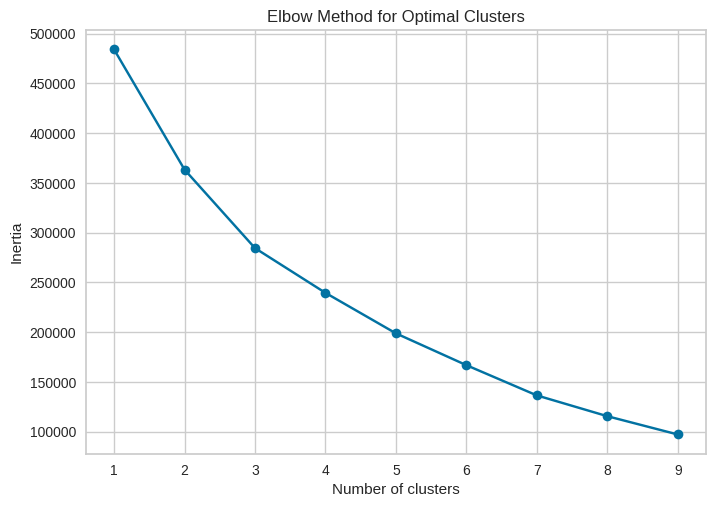

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[features])

# Determine optimal number of clusters using the elbow method
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [24]:
from sklearn.cluster import KMeans

# Based on the elbow method, we choose cluster 3 or 4
optimal_clusters = 3

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df_clean['cluster'] = kmeans_labels


In [25]:
cluster_summary = df_clean.groupby('cluster').agg({
    'guttmanScore': ['mean', 'std'],
    'guttmanScoreDistance': ['mean', 'std'],
    'guttmanScoreResponseTime': ['mean', 'std'],
    'guttmanScoreResponseTimeDistance': ['mean', 'std'],
    'guttmanError': ['mean', 'std'],
    'Z2': ['mean', 'std'],
    'KL': ['mean', 'std'],
    'KS': ['mean', 'std']
})
print(cluster_summary)

        guttmanScore           guttmanScoreDistance            \
                mean       std                 mean       std   
cluster                                                         
0           0.000746  0.000186             0.000050  0.000107   
1           0.000000  0.000000             0.000000  0.000000   
2           0.000768       NaN             0.000028       NaN   

        guttmanScoreResponseTime           guttmanScoreResponseTimeDistance  \
                            mean       std                             mean   
cluster                                                                       
0                       0.012910  0.297795                         0.000906   
1                       0.000000  0.000000                         0.000000   
2                    2326.985923       NaN                        86.184664   

                  guttmanError             Z2                  KL            \
              std         mean  std      mean       std

Cluster 2 stands out with significantly higher values for guttmanScoreResponseTime and guttmanScoreResponseTimeDistance, indicating it is very different from the other clusters. Since it contains a single data point, this cluster is most likely the outlier.

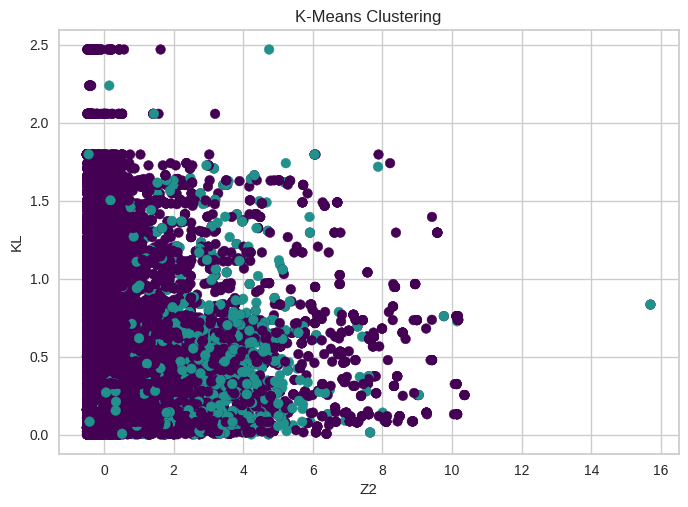

In [26]:
# Visualise clusters
plt.scatter(df_clean['Z2'], df_clean['KL'], c=kmeans_labels, cmap='viridis')
plt.xlabel('Z2')
plt.ylabel('KL')
plt.title('K-Means Clustering')
plt.show()

In [27]:
# Identify a specific cluster if cheating behavior is suspected in it
specific_cluster = 2  # Reason above

# Identifying potential cheaters
potential_cheaters_clusters = df_clean[df_clean['cluster'] == specific_cluster]

# Count unique answerSheetId in the identified cheaters using clustering
unique_candidate_cheaters_clusters_ids = potential_cheaters_clusters['answerSheetId'].unique()
print(f"Number of unique potential cheating answersheets identified by Clustering: {len(unique_candidate_cheaters_clusters_ids)}")

Number of unique potential cheating answersheets identified by Clustering: 1


In [28]:
# Display unique answerSheetId and corresponding candidateId
unique_cheaters_info = potential_cheaters_clusters[['answerSheetId', 'candidateId']].drop_duplicates()
print("Unique potential cheating answersheets and corresponding candidates identified by Clustering:")
print(unique_cheaters_info)

Unique potential cheating answersheets and corresponding candidates identified by Clustering:
                             answerSheetId  \
6291  08efa5f8-da1e-4767-8db9-8a00936f0a9d   

                               candidateId  
6291  1c24447b-cccd-4bca-8d00-b190ad488d30  


In [29]:
from sklearn.cluster import KMeans

# Based on the elbow method, we choose cluster 3 or 4. We tried with k=3, now lets validate results with K=4
optimal_clusters = 4

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df_clean['cluster'] = kmeans_labels


In [30]:
cluster_summary = df_clean.groupby('cluster').agg({
    'guttmanScore': ['mean', 'std'],
    'guttmanScoreDistance': ['mean', 'std'],
    'guttmanScoreResponseTime': ['mean', 'std'],
    'guttmanScoreResponseTimeDistance': ['mean', 'std'],
    'guttmanError': ['mean', 'std'],
    'Z2': ['mean', 'std'],
    'KL': ['mean', 'std'],
    'KS': ['mean', 'std']
})
print(cluster_summary)

        guttmanScore           guttmanScoreDistance           \
                mean       std                 mean      std   
cluster                                                        
0           0.000764  0.000166             0.000052  0.00011   
1           0.000707  0.000217             0.000048  0.00010   
2           0.000000  0.000000             0.000000  0.00000   
3           0.000768       NaN             0.000028      NaN   

        guttmanScoreResponseTime           guttmanScoreResponseTimeDistance  \
                            mean       std                             mean   
cluster                                                                       
0                       0.013271  0.301575                         0.000961   
1                       0.012135  0.289504                         0.000789   
2                       0.000000  0.000000                         0.000000   
3                    2326.985923       NaN                        86.184664  

Analyzing the statistics provided for clusters 0 through 3, it's evident that Cluster 3 stands out significantly in a similar manner to previous analysis, indicating potential anomalies.

In [31]:
# Identify a specific cluster if cheating behavior is suspected in it
specific_cluster = 3  # Reason above

# Identifying potential cheaters
potential_cheaters_clusters = df_clean[df_clean['cluster'] == specific_cluster]

# Count unique answerSheetId in the identified cheaters using clustering
unique_candidate_cheaters_clusters_ids = potential_cheaters_clusters['answerSheetId'].unique()
print(f"Number of unique potential cheating answersheets identified by Clustering: {len(unique_candidate_cheaters_clusters_ids)}")

Number of unique potential cheating answersheets identified by Clustering: 1


In [32]:
# Display unique answerSheetId and corresponding candidateId
unique_cheaters_info = potential_cheaters_clusters[['answerSheetId', 'candidateId']].drop_duplicates()
print("Unique potential cheating answersheets and corresponding candidates identified by Clustering:")
print(unique_cheaters_info)

Unique potential cheating answersheets and corresponding candidates identified by Clustering:
                             answerSheetId  \
6291  08efa5f8-da1e-4767-8db9-8a00936f0a9d   

                               candidateId  
6291  1c24447b-cccd-4bca-8d00-b190ad488d30  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is: 0.999531265671261


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is: 0.766686716537275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is: 0.6728048769693876


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is: 0.41181723346016674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is: 0.4122542881697137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is: 0.44069515947125926


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is: 0.41918438404259717


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is: 0.3184811695019691


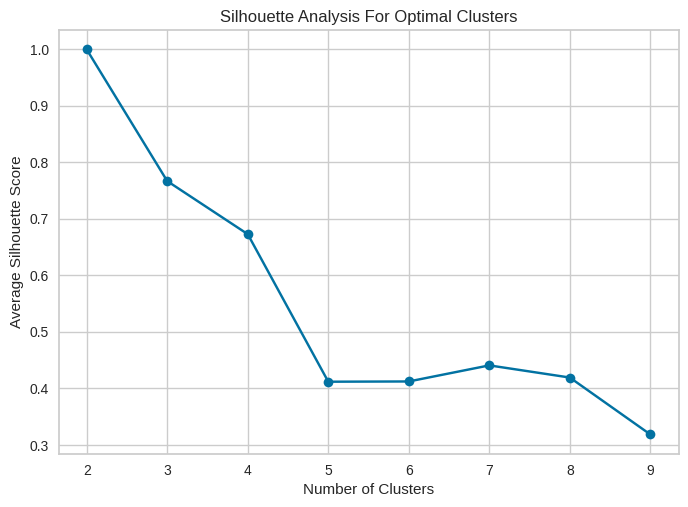

In [33]:
# Validating the number of optimal clusters using Silhouette Method
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Define the features to be used for anomaly detection
features = ['Z2', 'KL', 'KS', 'guttmanError', 'guttmanScore', 'guttmanScoreDistance', 'guttmanScoreResponseTime', 'guttmanScoreResponseTimeDistance']

# Drop rows with NaN in the relevant columns
df_clean = df.dropna(subset=features)

# Use only the defined features for clustering
X = df_clean[features]

# Range of clusters to test
range_n_clusters = list(range(2, 10))  # Usually, start with 2 to an upper limit that makes sense for your dataset

silhouette_avg_scores = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)  # X is now the dataset limited to specified features

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {num_clusters}, the average silhouette_score is: {silhouette_avg}")

# Plot silhouette scores
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis For Optimal Clusters')
plt.show()

In [46]:
optimal_clusters = 4  # Number chosen from silhouette analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_cluster_labels = kmeans.fit_predict(X)

# Add cluster information to the DataFrame
df['cluster'] = final_cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# Analyze clusters
for i in range(optimal_clusters):
    cluster_data = df[df['cluster'] == i]
    print(f"Analysis for Cluster {i}:")
    print(cluster_data.describe())  # Or any other statistical summary or plots

    # Count unique AnswerSheetIds in the cluster
    unique_answer_sheets = cluster_data['answerSheetId'].nunique()
    print(f"Number of unique AnswerSheetIds in Cluster {i}: {unique_answer_sheets}")

    # Count unique CandidateIds in the cluster
    unique_candidates = cluster_data['candidateId'].nunique()
    print(f"Number of unique CandidateIds in Cluster {i}: {unique_candidates}")

Analysis for Cluster 0:
       answer_score      maxScore  answeredCorrectly    Difficulty  \
count  44167.000000  44167.000000       44167.000000  44167.000000   
mean       0.970046      2.784160           0.482985      0.511079   
std        1.345286      2.418819           0.499716      0.370615   
min        0.000000      1.000000           0.000000      0.000000   
25%        0.000000      1.000000           0.000000      0.167442   
50%        1.000000      1.000000           0.000000      0.435714   
75%        1.000000      5.000000           1.000000      1.000000   
max       10.000000     10.000000           1.000000      1.000000   

       ResponseTime  Expected response time  SequenceOrder  TotalTestingTime  \
count  44167.000000            44167.000000   44167.000000      44167.000000   
mean      66.998663               88.853152      35.844182       6619.348851   
std       77.363590              117.255873      21.095108       1941.971204   
min        0.412000      

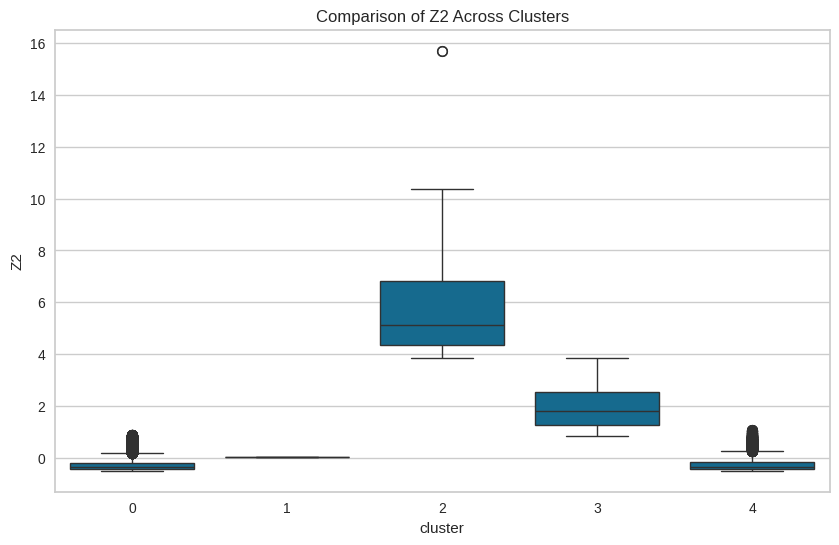

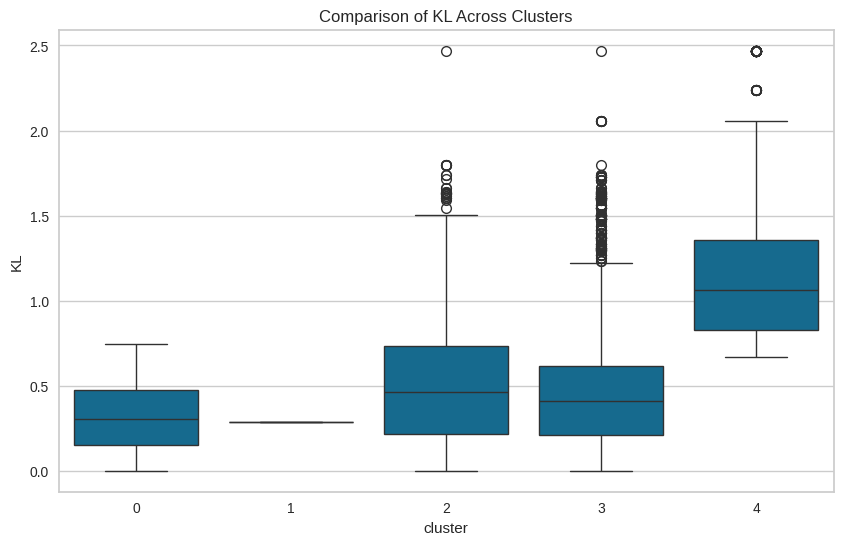

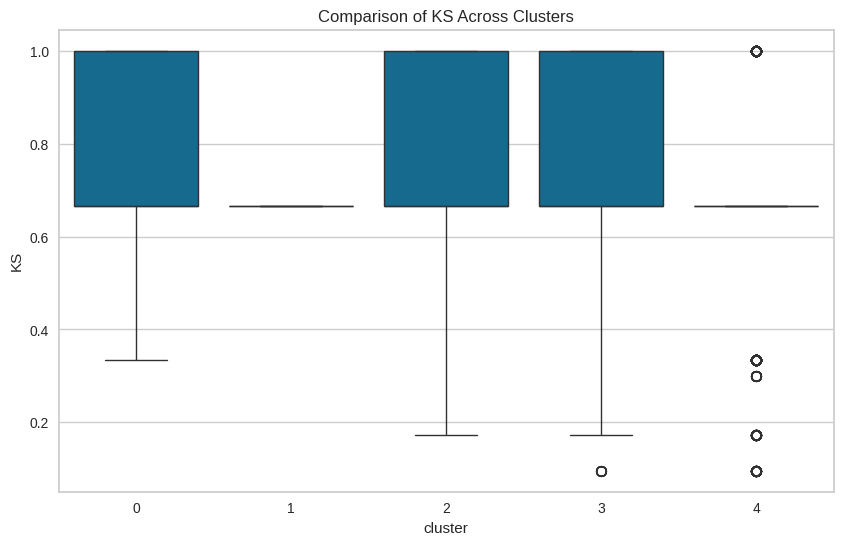

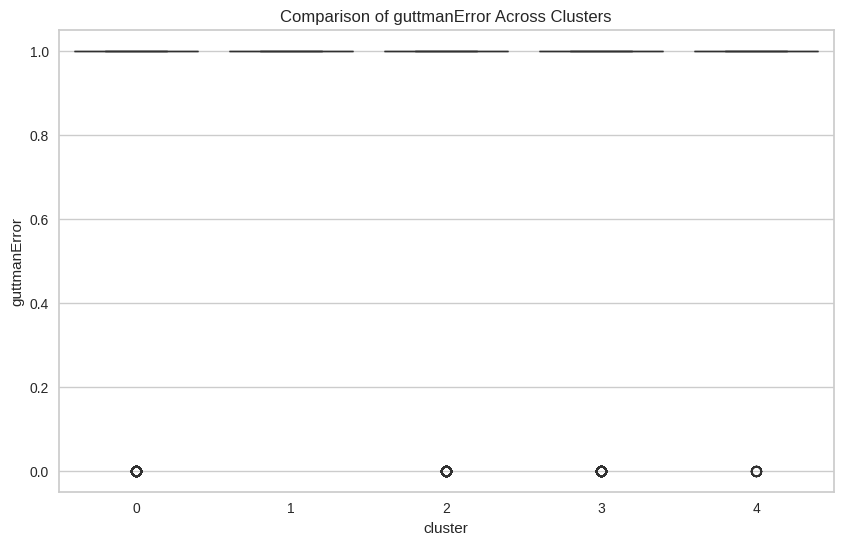

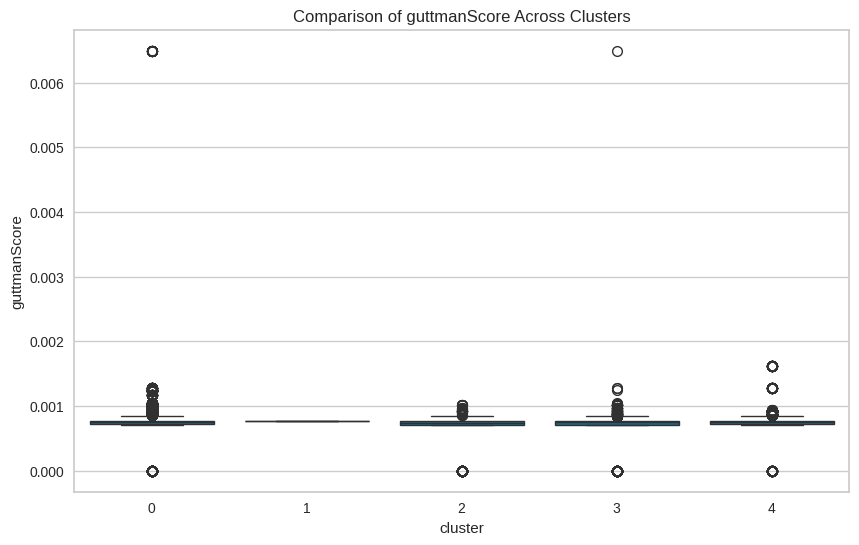

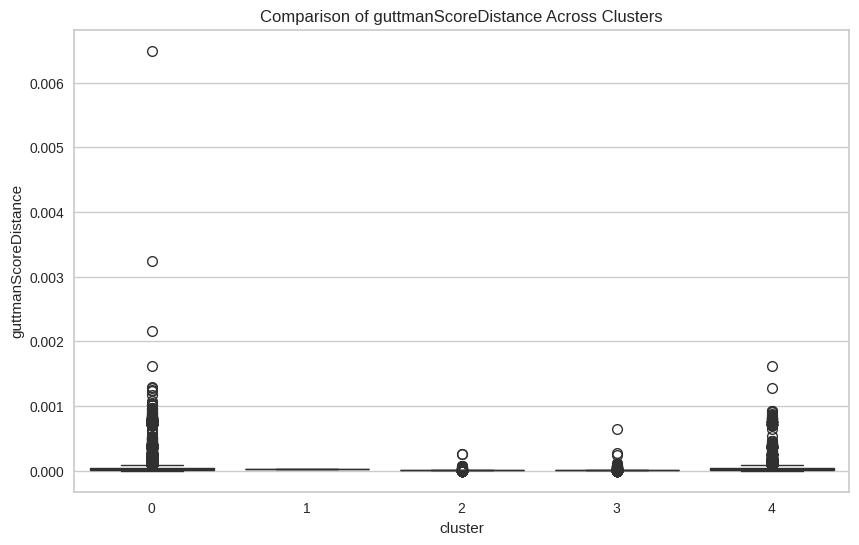

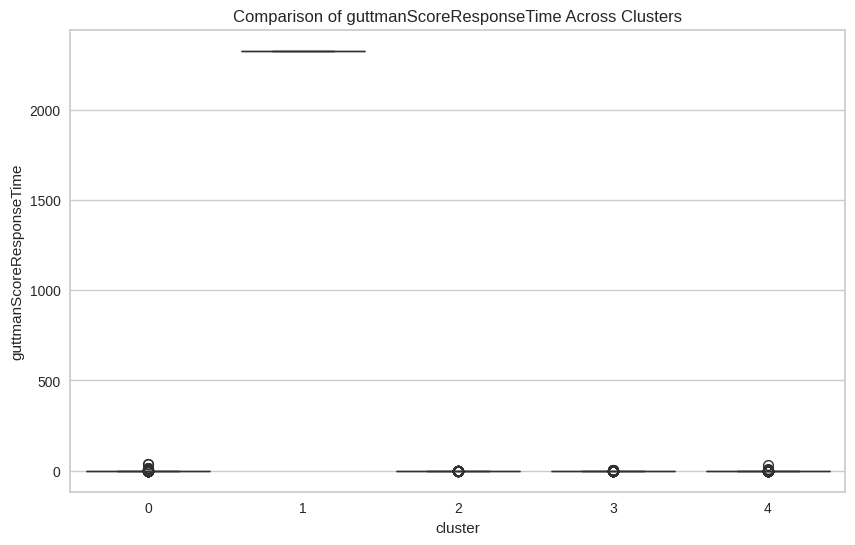

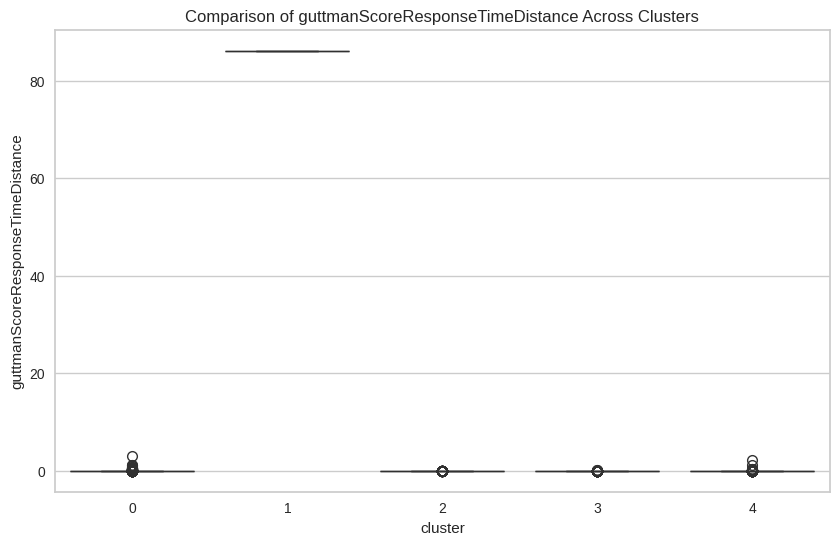

In [49]:
# Visualize comparison between clusters using box plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Comparison of {feature} Across Clusters')
    plt.show()

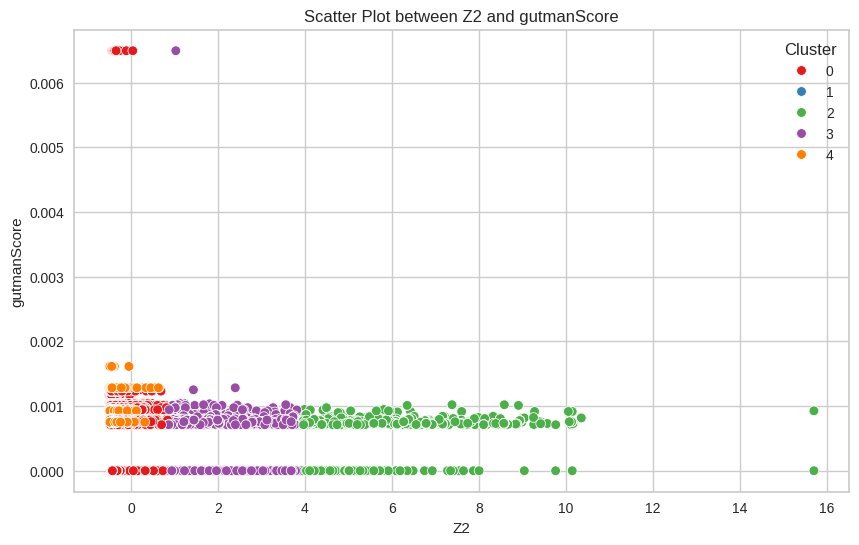

In [50]:
# Ensure the DataFrame contains the required columns
if 'Z2' in df.columns and 'guttmanScore' in df.columns and 'cluster' in df.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Z2', y='guttmanScore', hue='cluster', data=df, palette='Set1')
    plt.title('Scatter Plot between Z2 and gutmanScore')
    plt.xlabel('Z2')
    plt.ylabel('gutmanScore')
    plt.legend(title='Cluster')
    plt.show()
else:
    print("The DataFrame does not contain the required columns.")

In [ ]:
suspicious_cluster = 1  # Cluster identified for further investigation

# Filter the data to get entries from the suspicious cluster
suspicious_data = df[df['cluster'] == suspicious_cluster]

# Check if there is suspicious data and print it
if not suspicious_data.empty:
    print("Suspicious Answer Sheet IDs and Corresponding Candidate IDs:")
    # Ensure 'AnswerSheetId' and 'CandidateId' are the actual column names in your DataFrame
    print(suspicious_data[['answerSheetId', 'candidateId']])
else:
    print("No data found for the specified cluster.")


In [ ]:
# Display the list of unique candidate IDs
print("List of unique potential cheaters identified by Clustering:")
for candidate_id in unique_candidate_cheaters_clusters_ids:
    print(candidate_id)

In [ ]:
# Combine results from Isolation Forest and Clustering
combined_cheaters = set(unique_candidate_cheaters_ml_filtered_ids).intersection(set(unique_candidate_cheaters_clusters_ids))

print(f"Total unique potential cheaters identified: {len(combined_cheaters)}")

In [ ]:
# Display the list of unique candidate IDs
print("List of common potential cheaters identified by both the methods")
for candidate_id in combined_cheaters:
    print(candidate_id)

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df_clean['dbscan_cluster'] = dbscan_labels

# Identify potential cheaters (assuming -1 label for noise/outliers in DBSCAN)
potential_cheaters_dbscan = df_clean[df_clean['dbscan_cluster'] == -1]

# Count unique answerSheetId in the identified cheaters using DBSCAN
unique_candidate_cheaters_dbscan_ids = potential_cheaters_dbscan['answerSheetId'].unique()

print(f"Number of unique potential cheaters identified by DBSCAN: {len(unique_candidate_cheaters_dbscan_ids)}")


In [ ]:
print("Candidate IDs of potential cheaters identified by DBSCAN:", unique_candidate_cheaters_dbscan_ids)

In [ ]:
# Print the results
print(f"Number of unique potential cheating answerSheetIds identified by Isolation Forest: {len(unique_candidate_cheaters_ml_filtered_ids)}")

print(f"Number of unique potential cheating answerSheetIds identified by K-Means Clustering: {len(unique_candidate_cheaters_clusters_ids)}")

print(f"Number of unique potential cheating answerSheetIds identified by DBSCAN: {len(unique_candidate_cheaters_dbscan_ids)}")

In [ ]:
print(unique_candidate_cheaters_ml_filtered_ids)

In [ ]:
# make unique_candidate_cheaters_ml_filtered_ids as dataframe with colunmn name = 'answerSheetId'
unique_candidate_cheaters_ml_filtered_ids_df = pd.DataFrame(unique_candidate_cheaters_ml_filtered_ids, columns=['answerSheetId'])
# save df to csv
unique_candidate_cheaters_ml_filtered_ids_df.to_csv('unique_candidate_cheaters_ml_filtered_ids_df.csv', index=False)

In [ ]:
unique_candidate_cheaters_ml_filtered_ids_df.shape


In [ ]:
unique_candidate_cheaters_clusters_ids_df = pd.DataFrame(unique_candidate_cheaters_clusters_ids, columns=['answerSheetId'])
# save df to csv
unique_candidate_cheaters_clusters_ids_df.to_csv('unique_candidate_cheaters_clusters_ids_df.csv', index=False)

In [ ]:
unique_candidate_cheaters_clusters_ids_df.shape

In [ ]:
unique_candidate_cheaters_dbscan_ids_df = pd.DataFrame(unique_candidate_cheaters_dbscan_ids, columns=['answerSheetId'])
# save df to csv
unique_candidate_cheaters_dbscan_ids_df.to_csv('unique_candidate_cheaters_dbscan_ids_df.csv', index=False)

In [ ]:
# Combine results from Isolation Forest, K-Means, and DBSCAN
combined_cheaters = set(unique_candidate_cheaters_ml_filtered_ids).union(
    set(unique_candidate_cheaters_clusters_ids), set(unique_candidate_cheaters_dbscan_ids))

# Find common cheaters among the three methods
common_cheaters = set(unique_candidate_cheaters_ml_filtered_ids).intersection(
    set(unique_candidate_cheaters_clusters_ids), set(unique_candidate_cheaters_dbscan_ids))

print(f"Total unique potential cheating answerSheetIds identified: {len(combined_cheaters)}")
print(f"Number of common potential cheating answerSheetIds identified by all three methods: {len(common_cheaters)}")

In [ ]:
# Get candidateIds from df where answerSheetId = combined_cheaters
candidate_ids = df[df['answerSheetId'].isin(combined_cheaters)]['candidateId'].unique()
print("Candidate IDs of potential cheaters identified by all three methods:", len(candidate_ids))

In [ ]:
# Print table of cheating answerSheetIds and candidateIds
print("Cheating answerSheetIds and candidateIds:")

unique_pairs = df[df['answerSheetId'].isin(combined_cheaters)][['answerSheetId', 'candidateId']].drop_duplicates()

# Save unique_pairs as Excel file
unique_pairs.to_excel('unique_pairs.xlsx', index=False)

In [ ]:
print("Candidate IDs of common potential cheaters identified by all three methods:", common_cheaters)